In [ ]:
!git clone https://github.com/ultralytics/yolov5 #clone
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17485, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 17485 (delta 79), reused 30 (delta 30), pack-reused 17378 (from 3)
Receiving objects: 100% (17485/17485), 16.35 MiB | 19.13 MiB/s, done.
Resolving deltas: 100% (11990/11990), done.
/content/yolov5


In [ ]:

!pip install -qr requirements.txt #install dependencies
import torch

from IPython.display import Image, clear_output # to disply image
# from util.google_utils import gdrive_download # to download models/datasets

#clear output
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.1 MB/s eta 0:00:00
Setup complete. Using torch 2.6.0+cu124 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15095MB, multi_p

# costom Dataset


In [ ]:
%cd /content
!curl -L "https://app.roboflow.com/ds/f7RwEhTXKG?key=UAFZIXEIml" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   3132      0 --:--:-- --:--:-- --:--:--  3127
100 12.2M  100 12.2M    0     0  10.0M      0  0:00:01  0:00:01 --:--:-- 76.2M
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/IMG-20240321-WA0039_jpg.rf.c7e9f155fc6ff2df664ef4b1f9b91cc7.jpg  
 extracting: test/images/IMG-20240321-WA0057_jpg.rf.9ed78dd0b28a4dac0267c0c4bfb59454.jpg  
 extracting: test/images/IMG-20240321-WA0063_jpg.rf.6368c17a930e783f37fd689b9e3aaf22.jpg  
 extracting: test/images/IMG-20240321-WA0067_jpg.rf.e739ecd40cd3dc24da5628d30e1c40e8.jpg  
 extracting: test/images/IMG-20240321-WA0074_jpg.rf.c3c8f6084c6bcd652b2de791a8a70747.jpg  
 extracting: test/images/VID-20250508-

In [ ]:
 # this is the YMAL file we're loading into this notebook with our data
%cat data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 5
names: ['green-signal', 'helmet-violation', 'motorcycle', 'red-signal', 'triple-riding']

roboflow:
  workspace: workspace01-myqbb
  project: violation-on-traffic
  version: 3
  license: CC BY 4.0
  url: https://universe.roboflow.com/workspace01-myqbb/violation-on-traffic/dataset/3

# Define model Configuration and Architecture
We will write a yaml script that defines the parameters for our modellike the number of classes, anchore and each layer.
you don't need to edit these cells, but you may

In [ ]:
# define number of classes based on yaml
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
num_classes

'5'

In [ ]:
# this is the model configuration that we will use
%cat /content/yolov5/models/yolov5s.yaml

# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, 

In [ ]:
# costomize IPython writeflie so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]], # cat backbone P3
    [-1, 3, C3, [256, False]], # 17 (P3/8-small)

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]], # cat head P4
    [-1, 3, C3, [512, False]], # 20 (P4/16-medium)

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]], # cat head P5
    [-1, 3, C3, [1024, False]], # 23 (P5/32-large)

    [[17, 20, 23], 1, Detect, [nc, anchors]], # Detect(P3, P4, P5)
  ]


In [ ]:

%cat /content/yolov5/models/custom_yolov5s.yaml


# parameters
nc: 5  # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]], # cat backbone P3
    [


### Train Custom YOLOv5 Detector
Next, we'll fire off training!

Here, we are able to pass a number of arguments:

- img: define input image size
- batch: determine batch size
- epochs: define the number of training epochs.(Note: often, 3000+ are common here!)
- data: set the path to our yaml file
- cfg: specify our model configuration
- weights: specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive folder)
- name: result names
- nosave: only save the final checkpoint
- cache: cache images for faster training

In [ ]:
# train yolov5 on costom data for epochs
# time its performamce
%%time
%cd /content/yolov5/
!python train.py --img 600 --batch 16 --epochs 50 --data /content/data.yaml --weights /content/yolov5/yolov5s.pt

/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-13 06:31:12.039994: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747117872.253196    1023 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747117872.311593    1023 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for 

# Evaluate Custom YOLOv5 Detector Performance

Training losses and performance metrics are saved to Tensorboard and also to a logfile defined above with the **--name** flag when we train. In our case, we named this `yolov5s_results`. (If given no name, it defaults to `results.txt`.) The results file is plotted as a png after training completes.

Note from Glenn: Partially completed `results.txt` files can be plotted with `from utils.utils import plot_results; plot_results()`.

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
# %load_ext tensorboard
# %tensorboard --logdir runs

In [ ]:
!nvidia-smi

Tue May 13 06:36:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   73C    P0             31W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

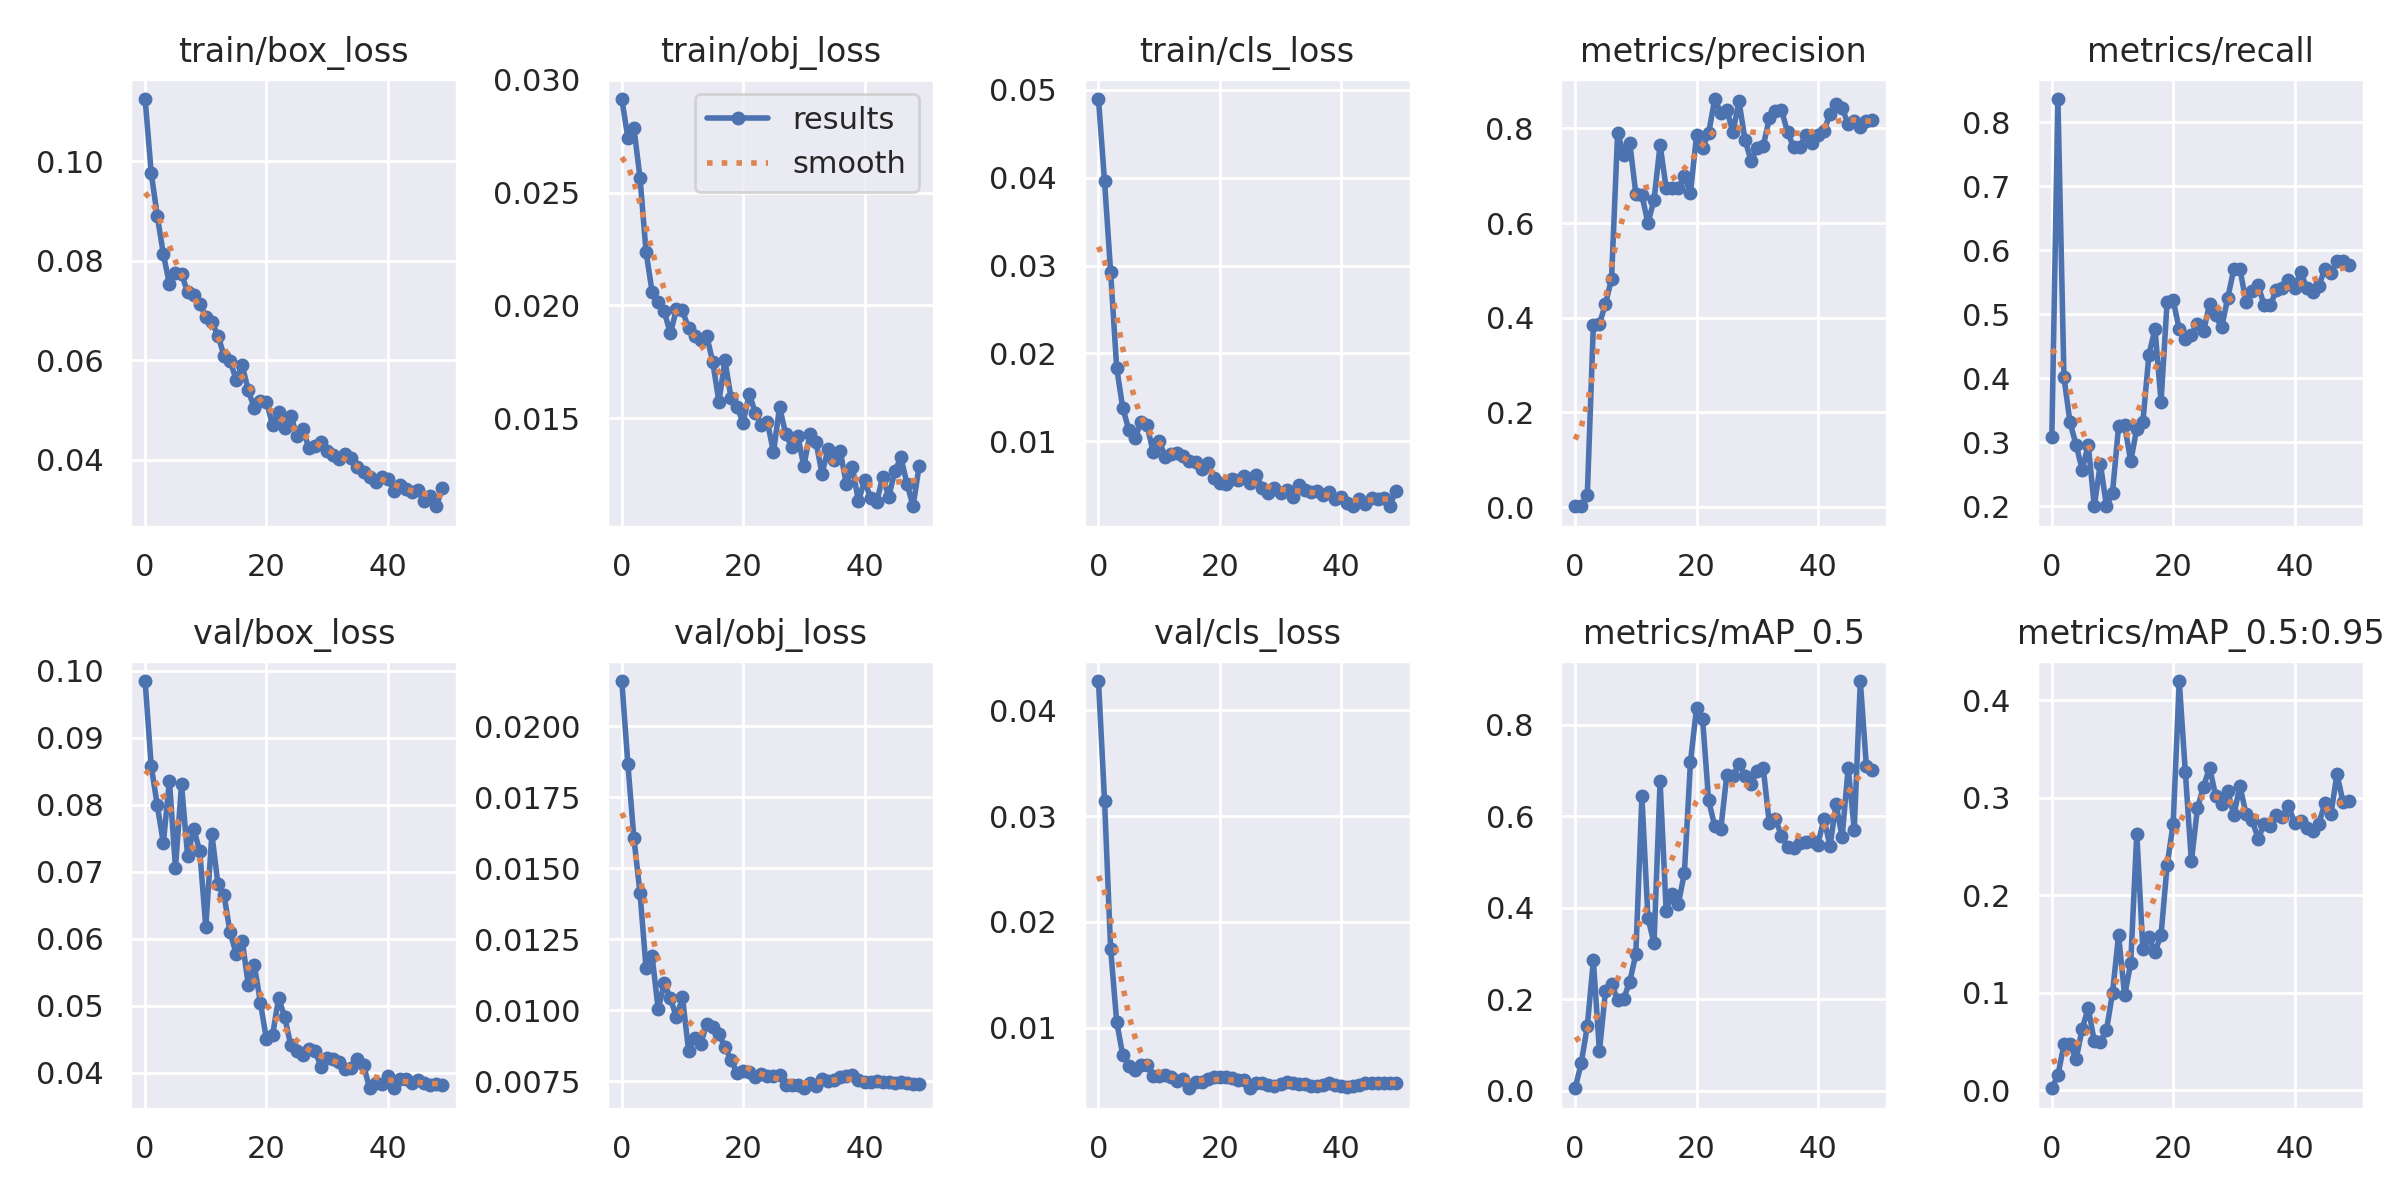

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whetever reason..
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/exp/results.png', width=1000)

### Curious? Visualize Our Training Data with Labels

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects.

Note a mosaic dataloader is used for training (shown below), a new dataloading concept developed by Glenn Jocher and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

GROUND TRUTH TRAINING DATA:


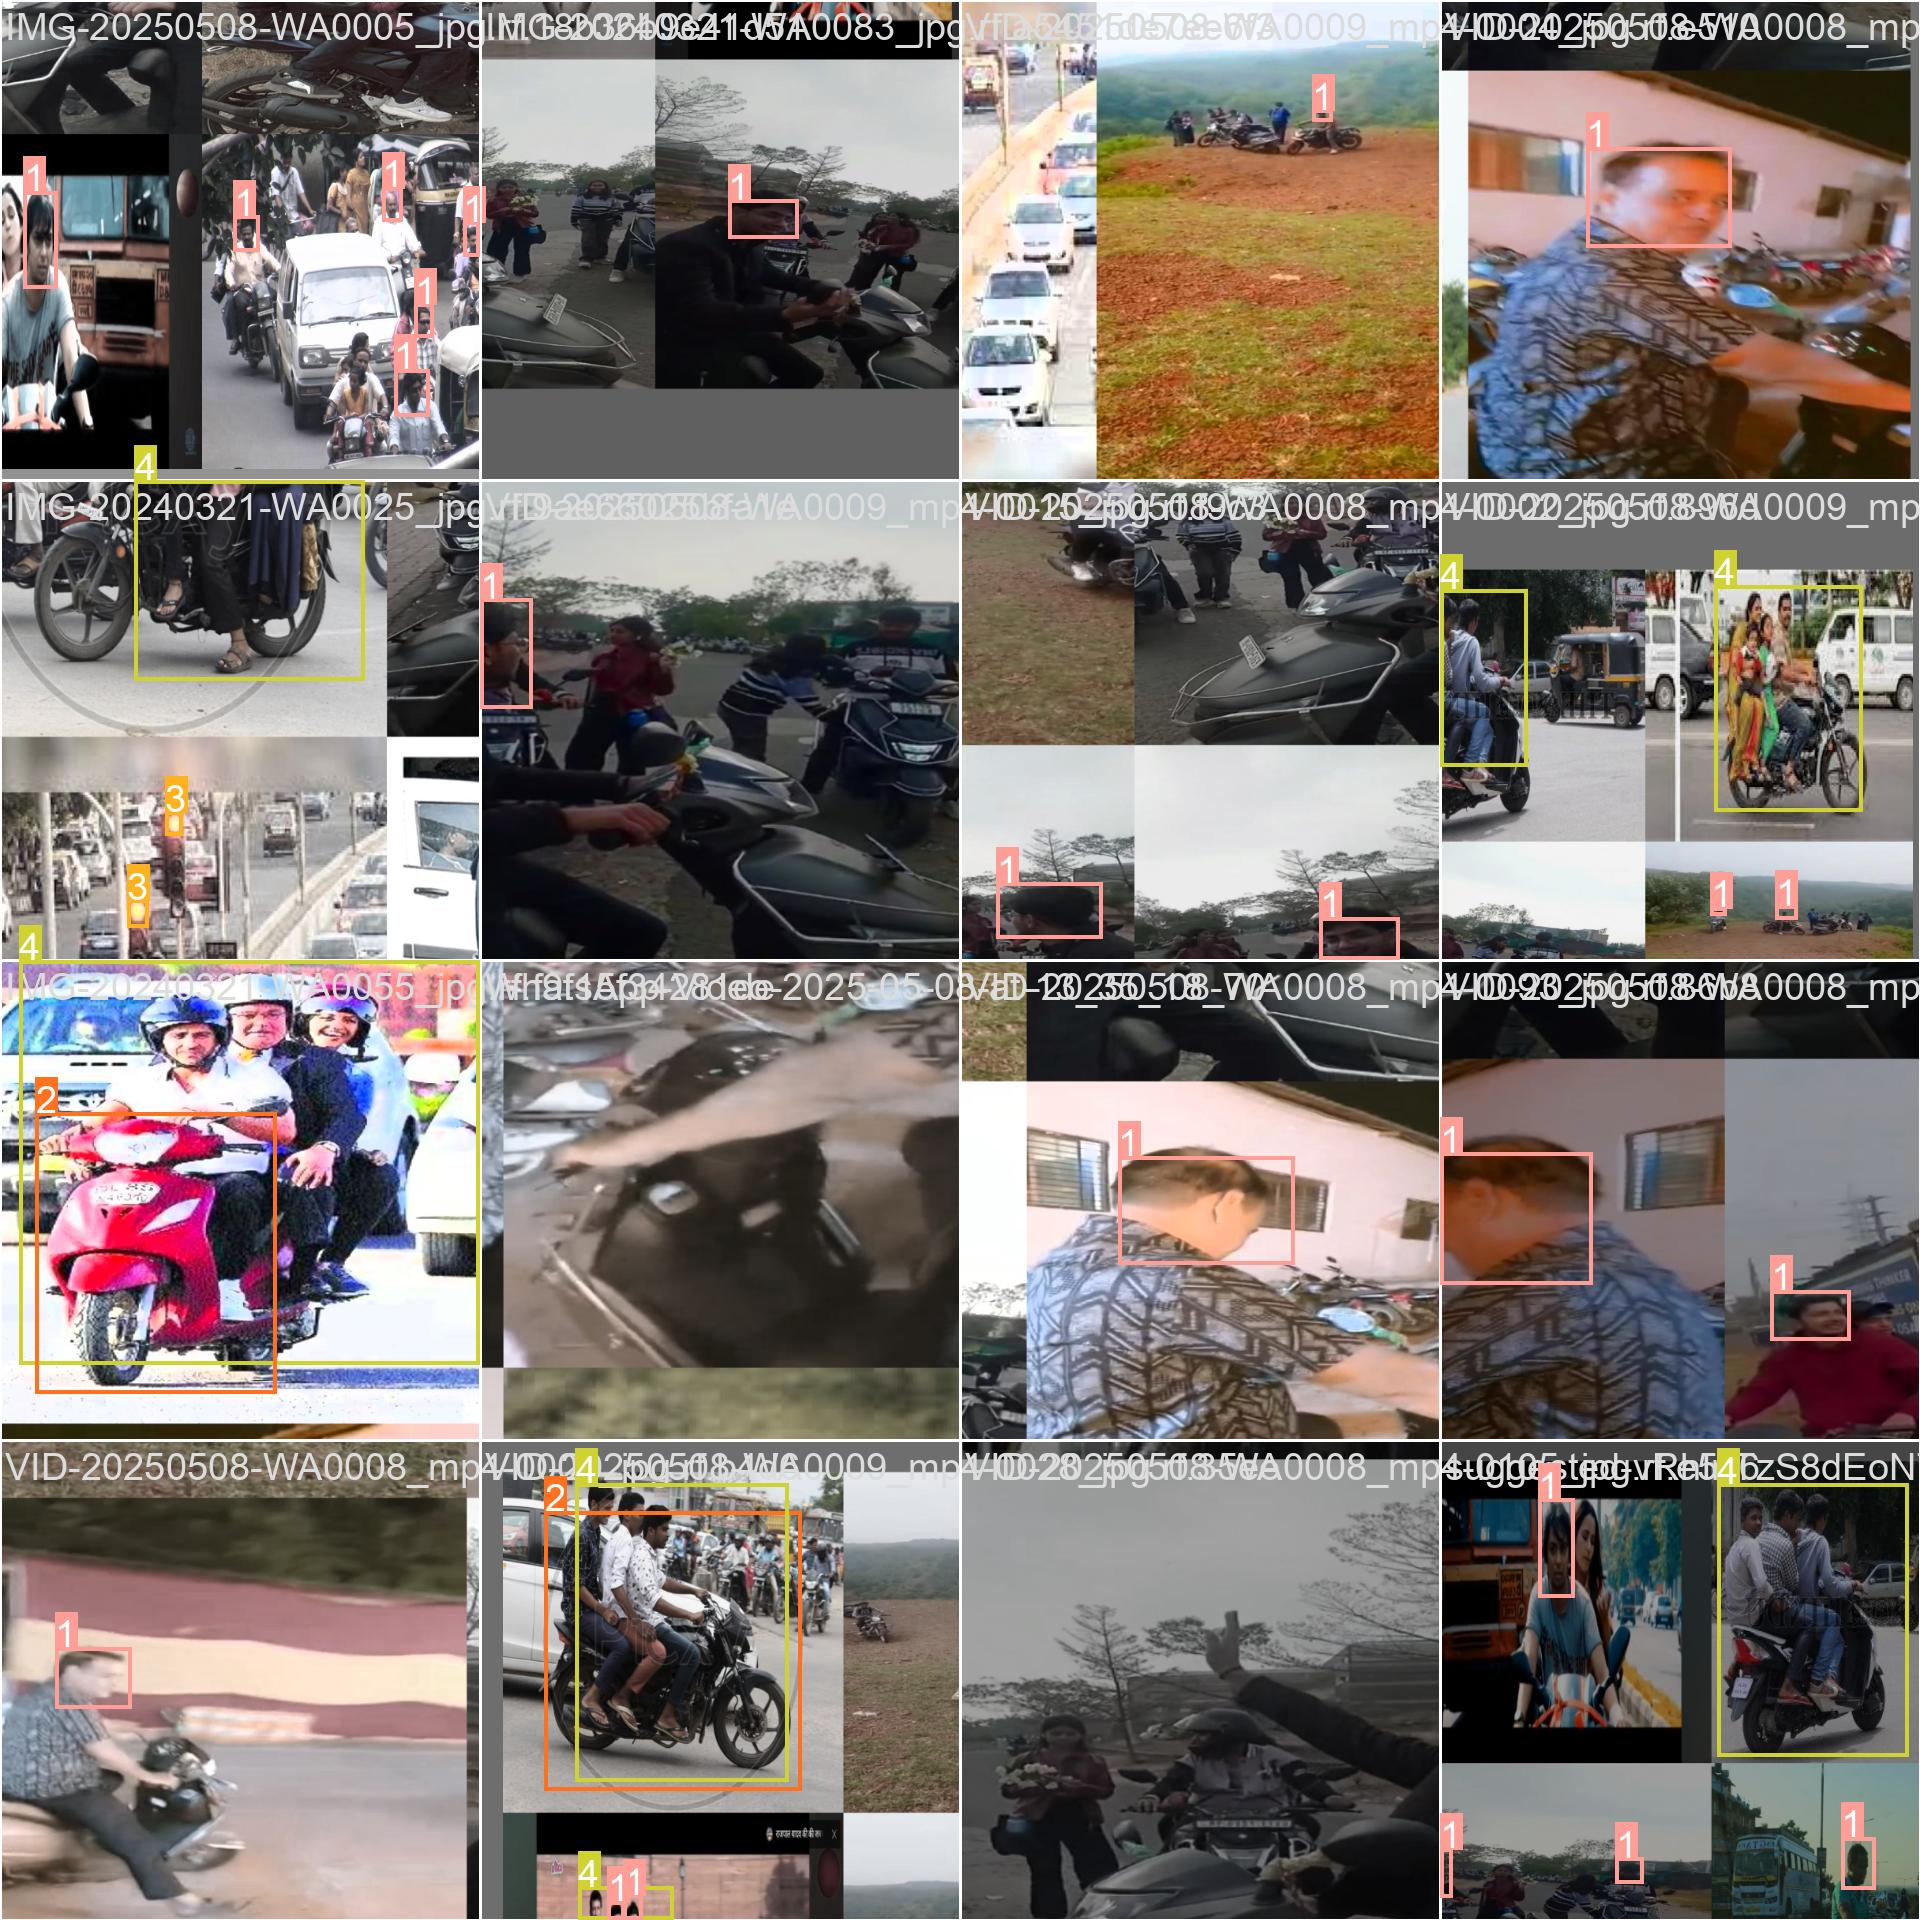

In [ ]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/exp/train_batch1.jpg', width=900)

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [ ]:
#trained weights are saved by default in our weights folder
%ls /content/yolov5/runs

train/


In [ ]:
%ls /content/yolov5/runs/train/exp/weights

best.pt  last.pt


In [ ]:

%cd /content/yolov5
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.05 --source /content/test/images

/content/yolov5
detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.05, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/36 /content/test/images/IMG-20240321-WA0039_jpg.rf.c7e9f155fc6ff2df664ef4b1f9b91cc7.jpg: 640x640 3 helmet-violations, 2 triple-ridings, 11.4ms
image 2/36 /content/test/images/IMG-20240321-WA0057_jpg.rf.9ed78dd0b28a4dac0267c0c4bfb59454.jpg: 640x640 1 motorcycle, 1 triple-ri

In [ ]:

%cp /content/yolov5/runs/train/exp/weights/best.pt /content/yolov5/models

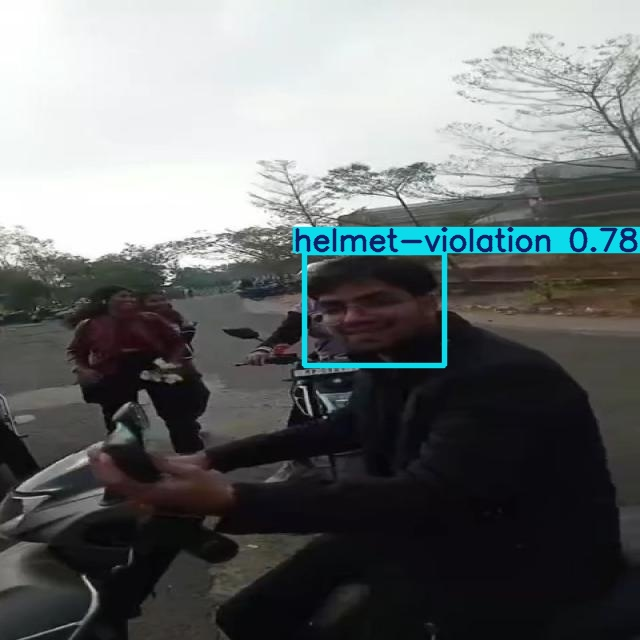

In [ ]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/VID-20250508-WA0008_mp4-0001_jpg.rf.2dac163e9be441bb74bfab033a5afdac.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")


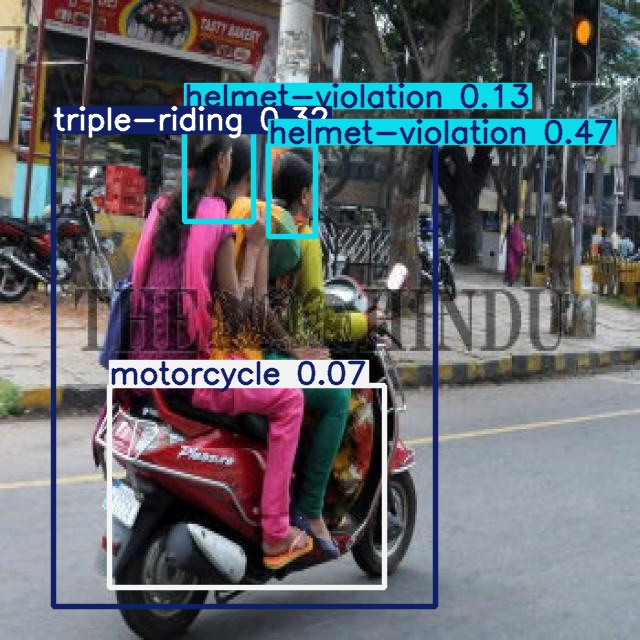

In [ ]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/IMG-20240321-WA0063_jpg.rf.6368c17a930e783f37fd689b9e3aaf22.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# For Video


In [ ]:
from google.colab import files
uploaded = files.upload()
uploaded_filename = list(uploaded.keys())[0]

In [ ]:
!python detect.py \
  --weights /content/yolov5/runs/train/exp/weights/best.pt \
  --img 640 \
  --conf 0.15 \
  --source '{uploaded_filename}'

In [ ]:
!python detect.py \
  --weights /content/yolov5/runs/train/exp/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source '{uploaded_filename}'



In [ ]:
%cp /content/yolov5/runs/detect/exp/  # or exp2, exp3, etc.


cp: missing destination file operand after '/content/yolov5/runs/detect/exp/'
Try 'cp --help' for more information.
